In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter

In [2]:
Data = pd.read_csv('all_parameters.csv', sep=';')

In [3]:
d = np.array(Data)

In [4]:
Data

,№ п/п,Индекс ВМО,Наименование станции,широта,долгота,R,P,h,p-value,R.1,P.1,h.1,p-value.1
0,1,20046,"Им.Э.Т.Кренкеля, ГМО",80° 37′,58° 03′,"0,870012277","0,309965139",1,"0,016821934","0,629831406","0,240971928",1,"2,43E-05"
1,2,20069,Визе,79° 30′,76° 59′,"0,743809275","0,26512386",1,"0,00041292","0,542552892","0,209796988",1,"0,002878708"
2,3,20087,Голомянный,79° 33′,90° 37′,"0,769758598","0,314084985",1,"0,019035114","0,591880559","0,184434133",1,"0,020390153"
3,4,20107,Баренцбург,78° 04′,14° 15′,"0,887073517","0,275001946",1,"8,83E-06","0,633720554","0,244085503",0,"0,08318431"
4,5,20289,Русский,77° 10′,96° 26′,"0,7926965","0,333463959",1,"0,00027089","0,559959553","0,175576514",1,"0,00024792"
5,6,20292,"Им.Е.К.Федорова, ГМО",77° 43′,104° 18′,"0,727448191","0,289310056",1,"1,47E-07","0,597789751","0,219096762",1,"1,47E-05"
6,7,20476,Стерлегова,75° 25′,88° 54′,"0,909232042","0,357976384",1,"0,048638731","0,573522024","0,175890839",1,"0,00091265"
7,8,20667,Им. М.В.Попова,73° 20′,70° 03′,"0,729012216","0,244411419",1,"2,74E-10","0,520803942","0,265445225",1,"6,39E-07"
8,9,20674,Диксон,73° 30′,80° 24′,"0,766203409","0,240918819",1,"0,000248465","0,557099262","0,250443077",0,"0,228917717"
9,10,20744,Малые Кармакулы,72° 22′,52° 42′,"0,824547335","0,278348712",1,"0,002816862","0,574566119","0,215980084",0,"0,612333014"


In [5]:
latitude = Data['широта']
longitude = Data['долгота']
name = Data['Наименование станции']

In [6]:
def transforation_coordinate (s):
    s = s.replace('о', '').replace('o', '').replace('′', '').replace('’', '').replace('\xc2\xb0', '').replace('\xc2\xa0', '').replace(' ', '')
    gr = int(s)//100
    m = float(s)%100
    #print 'gr:', gr, 'min:', m
    return gr + m/60
transforation_coordinate('80° 37′')

80.61666666666666

In [7]:
lat = np.array([transforation_coordinate(i) for i in latitude])
lon = np.array([transforation_coordinate(i) for i in longitude])

/Users/tt/anaconda/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/tt/anaconda/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


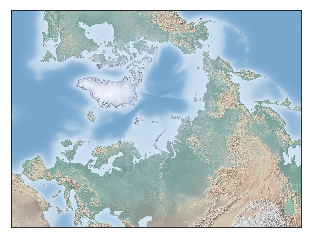

In [8]:

# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_0=82., lon_0 = 55.)
m.shadedrelief()
plt.show()

In [9]:
parametr = 'R'
par1 = [float(i.replace(',', '.')) for i  in np.array(Data[parametr])]
parametr = 'P'
par2 = [float(i.replace(',', '.')) for i  in np.array(Data[parametr])]

data = pd.DataFrame([[par1[ind], par2[ind]] for ind in range(0, len(par1))], columns=['R', 'P'])
data = data.sort_values(['R', 'P'], ascending = [1, 0])
data.head()

,R,P
349,0.606245,0.470020
138,0.620334,0.304895
30,0.627600,0.216067
437,0.635679,0.230577
440,0.636633,0.201118


In [16]:
path = '../написание диплома/LaTeX/images/'
from sklearn import linear_model

# Дождливые периоды


In [125]:
parametr = 'R'
par1 = [float(i.replace(',', '.')) for i  in np.array(Data[parametr])]
parametr = 'P'
par2 = [float(i.replace(',', '.')) for i  in np.array(Data[parametr])]
dtype = [('R', float), ('P', float)]
data = np.array([(par1[ind], par2[ind]) for ind in range(0, len(par1))], dtype=dtype)

In [126]:
size = y.shape
X = np.array(par1).reshape(-1, 1) # R
y = np.array(par2).reshape(-1, 1) # P
X = np.append(X, np.ones(size), axis=1)

regr = linear_model.LinearRegression()
regr.fit(X, y)

print regr.coef_
r_c = regr.coef_[0][0]

[[ 0.39577153  0.        ]]


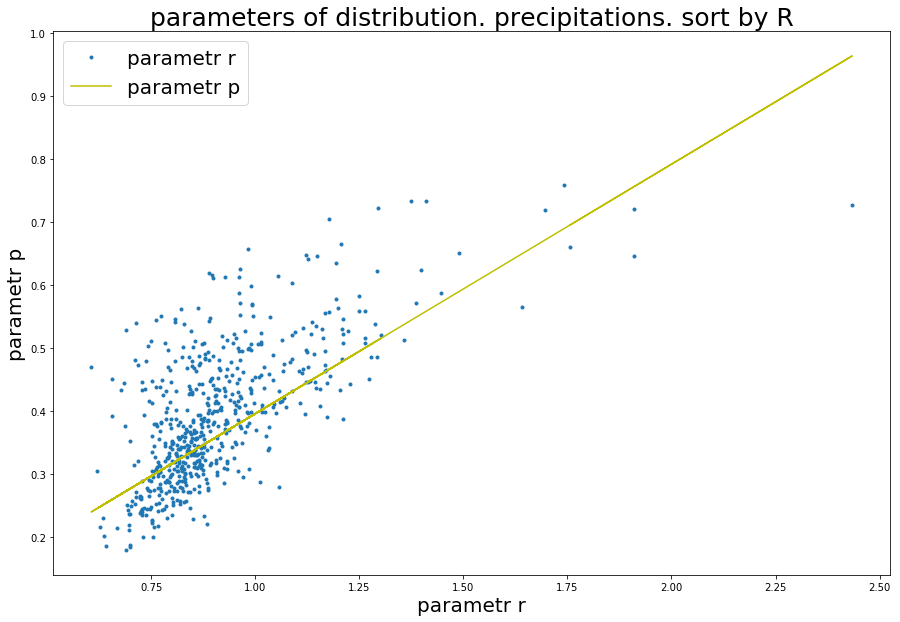

In [127]:
plt.figure(figsize=(15,10))
plt.plot(data['R'], data['P'], '.')
plt.plot(data['R'], data['R']*r_c, 'y')
plt.legend(['parametr r', 'parametr p'],  fontsize=20)
plt.xlabel('parametr r', fontsize = 20)
plt.ylabel('parametr p', fontsize = 20)
plt.title('parameters of distribution. precipitations. sort by R',  fontsize=25)
plt.savefig(path + 'RP_precipitation.pdf')
plt.show()
plt.close()

In [128]:
data = np.sort(data, order='R')  
plt.figure(figsize=(15,10))
plt.plot(data['R'], 'ro')
plt.plot(data['P'], 'p')
plt.plot(data['R'] * r_c, 'black', lw=5)
plt.legend(['parametr r', 'parametr p', 'fitted p'],  fontsize=20)
plt.xlabel('points', fontsize = 20)
plt.ylabel('value of parameters', fontsize = 20)
plt.title('parameters of distribution. precipitations. sort by R',  fontsize=25)
plt.savefig(path + 'precipitation_sort_by_R.pdf')
#plt.show()
plt.close()

In [129]:
data = np.sort(data, order='P')  

plt.figure(figsize=(15,10))
plt.plot(data['R'], 'ro')
plt.plot(data['P'], 'p-')
plt.plot(data['P'] / r_c, 'black', lw = 5)
plt.legend(['parametr r', 'parametr p', 'fitted p'],  fontsize=20)
plt.xlabel('points', fontsize = 20)
plt.ylabel('value of parameters', fontsize = 20)
plt.title('parameters of distribution. precipitations. sort by P',  fontsize=25)
plt.savefig(path + 'precipitation_sort_by_P.pdf')
#plt.show()
plt.close()

# Сухие периоды

In [134]:
parametr = 'R.1'
par1 = [float(i.replace(',', '.')) for i  in np.array(Data[parametr])]
parametr = 'P.1'
par2 = [float(i.replace(',', '.')) for i  in np.array(Data[parametr])]
dtype = [('R', float), ('P', float)]
data = np.array([(par1[ind], par2[ind]) for ind in range(0, len(par1))], dtype=dtype)

In [144]:
size = y.shape
X = np.array(par1).reshape(-1, 1) # R
y = np.array(par2).reshape(-1, 1) # P
#X = np.append(X, np.ones(size), axis=1)

regr = linear_model.LinearRegression()
regr.fit(X, y)

print regr.coef_
a = regr.coef_[0][0]
print regr.intercept_
b = regr.intercept_

[[ 0.15669122]]
[ 0.10125928]


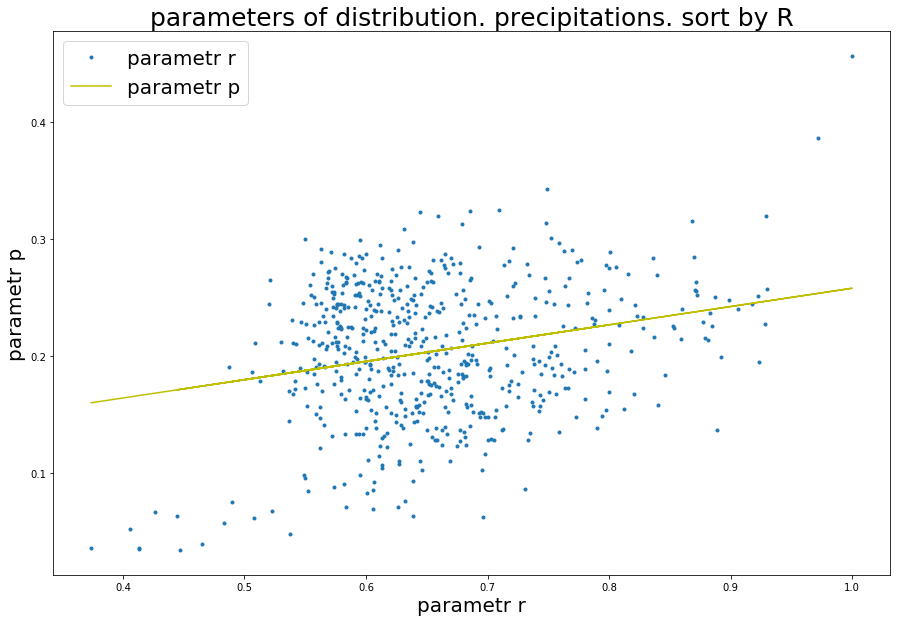

In [145]:
plt.figure(figsize=(15,10))
plt.plot(data['R'], data['P'], '.')
plt.plot(data['R'], data['R']*a + b, 'y')
plt.legend(['parametr r', 'parametr p'],  fontsize=20)
plt.xlabel('parametr r', fontsize = 20)
plt.ylabel('parametr p', fontsize = 20)
plt.title('parameters of distribution. precipitations. sort by R',  fontsize=25)
plt.savefig(path + 'RP_dry_periods.pdf')
plt.show()
plt.close()

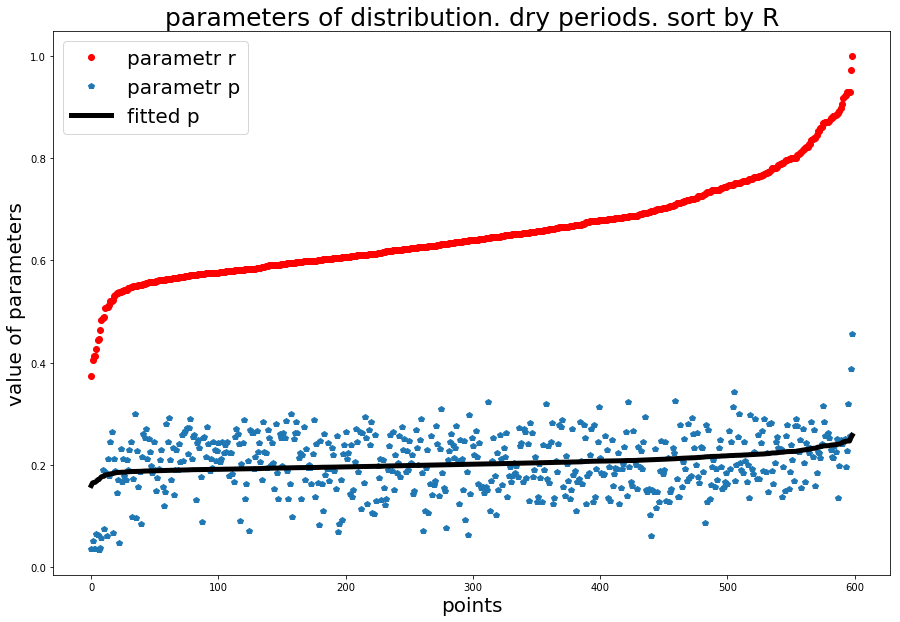

In [146]:
data = np.sort(data, order='R')  
plt.figure(figsize=(15,10))
plt.plot(data['R'], 'ro')
plt.plot(data['P'], 'p')
plt.plot(data['R'] * a + b, 'black', lw=5)
plt.legend(['parametr r', 'parametr p', 'fitted p'],  fontsize=20)
plt.xlabel('points', fontsize = 20)
plt.ylabel('value of parameters', fontsize = 20)
plt.title('parameters of distribution. dry periods. sort by R',  fontsize=25)
plt.savefig(path + 'dry_periods_sort_by_R.pdf')
plt.show()
plt.close()

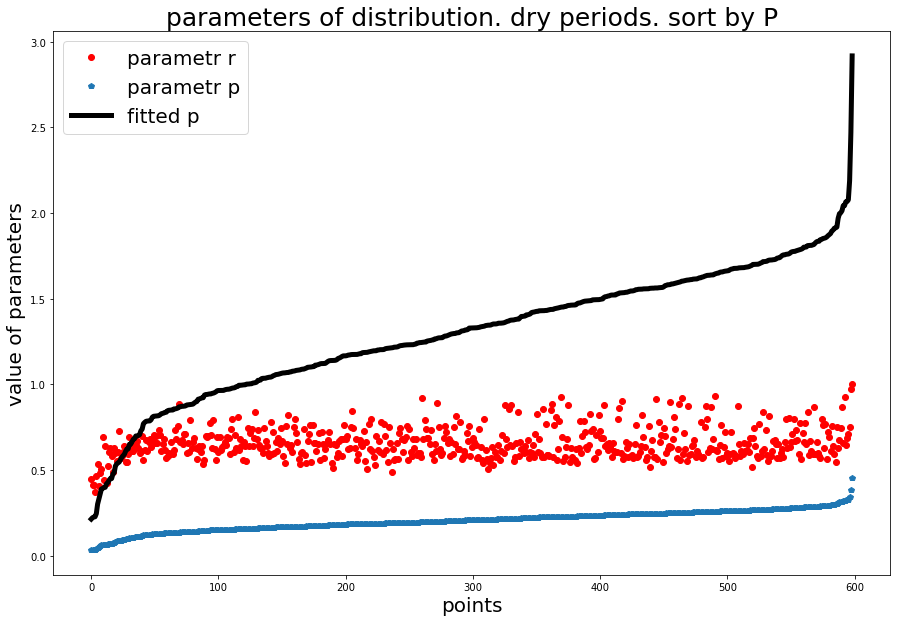

In [124]:
data = np.sort(data, order='P')  
plt.figure(figsize=(15,10))
plt.plot(data['R'], 'ro')
plt.plot(data['P'], 'p')
plt.plot(data['P'] / r_c, 'black', lw=5)
plt.legend(['parametr r', 'parametr p', 'fitted p'],  fontsize=20)
plt.xlabel('points', fontsize = 20)
plt.ylabel('value of parameters', fontsize = 20)
plt.title('parameters of distribution. dry periods. sort by P',  fontsize=25)
plt.savefig(path + 'dry_periods_sort_by_P.pdf')
plt.show()
plt.close()

In [83]:
parametr = 'P'
par1 = np.array([float(i.replace(',', '.')) for i  in np.array(Data[parametr])])
parametr = 'P.1'
par2 = np.array([float(i.replace(',', '.')) for i  in np.array(Data[parametr])])
p = par1+par2

parametr = 'R'
par1 = np.array([float(i.replace(',', '.')) for i  in np.array(Data[parametr])])
parametr = 'R.1'
par2 = np.array([float(i.replace(',', '.')) for i  in np.array(Data[parametr])])
r = par1 + par2

dtype = [('R', float), ('P', float)]
data = np.array([(r[ind], p[ind]) for ind in range(0, len(r))], dtype=dtype)

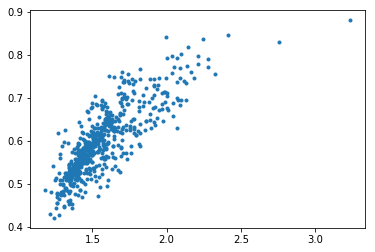

In [88]:
plt.plot(data['R'], data['P'], '.')
plt.show()

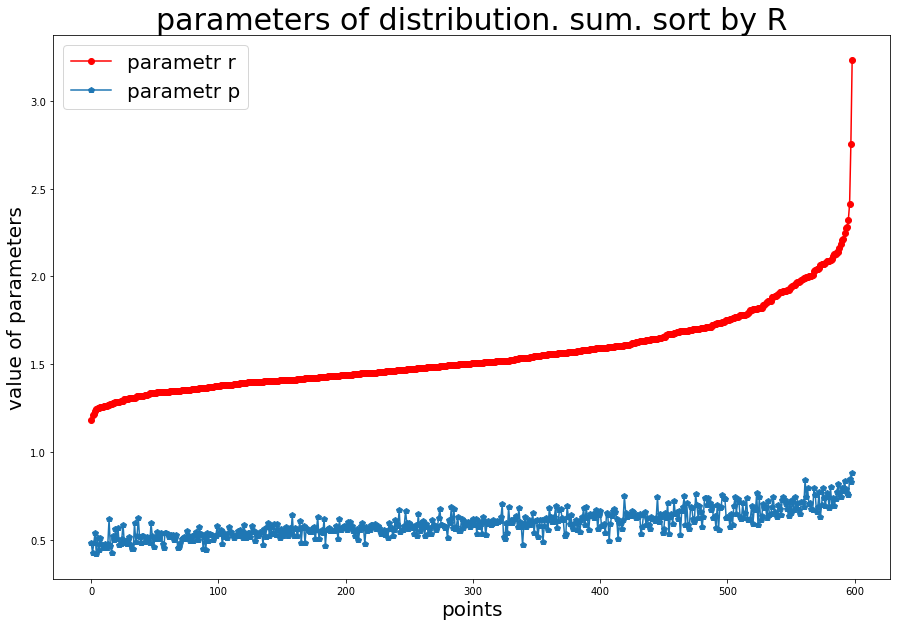

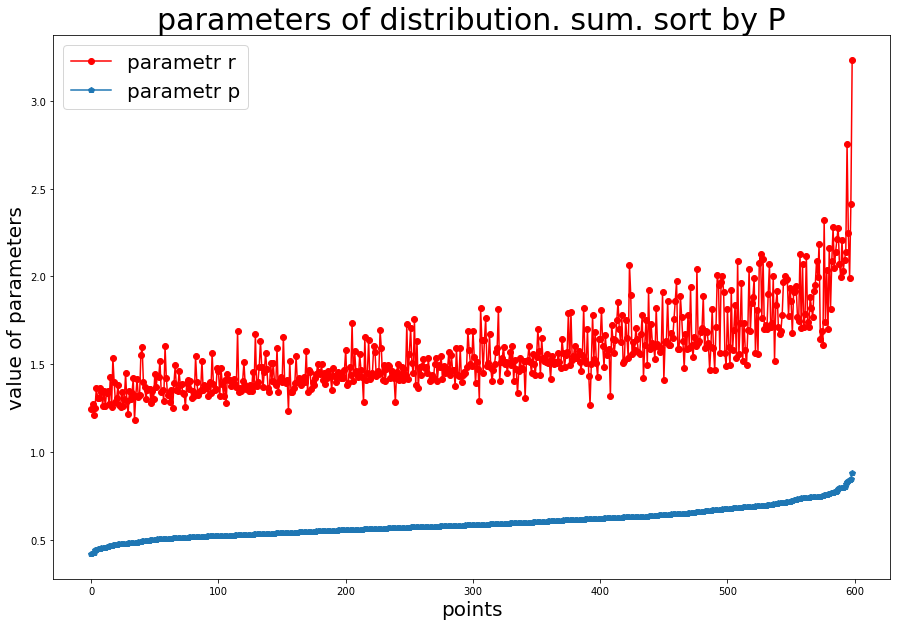

In [84]:
data = np.sort(data, order='R') 
plt.close()
plt.figure(figsize=(15,10))
plt.xlabel('points', fontsize = 20)
plt.ylabel('value of parameters', fontsize = 20)
plt.plot(data['R'], 'ro-')
plt.plot(data['P'], 'p-')
plt.legend(['parametr r', 'parametr p'],  fontsize=20)
plt.title('parameters of distribution. sum. sort by R',  fontsize=30)
plt.savefig(path + 'sum_sort_by_R.pdf')
plt.show()

plt.close()
data = np.sort(data, order='P') 
plt.figure(figsize=(15,10))
plt.xlabel('points', fontsize = 20)
plt.ylabel('value of parameters', fontsize = 20)
plt.plot(data['R'], 'ro-')
plt.plot(data['P'], 'p-')
plt.legend(['parametr r', 'parametr p'],  fontsize=20)
plt.title('parameters of distribution. sum. sort by P',  fontsize=30)
plt.savefig(path + 'sum_sort_by_P.pdf')
plt.show()

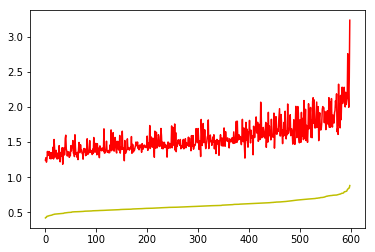

In [41]:
dtype = [('R', float), ('P', float)]
data = np.array([(r[ind], p[ind]) for ind in range(0, len(r))], dtype=dtype)
data = np.sort(data, order='P') 
plt.plot(data['R'], 'r-')
plt.plot(data['P'], 'y-')
plt.show()

In [48]:
#print min(par), max(par)
print path

../написание диплома/LaTeX/images/


In [63]:
def f(parametr, pic_name):
    par = [float(i.replace(',', '.')) for i  in np.array(Data[parametr])]
    
    color = []
    for i in par:
#        const = 0.98
        const = min(par)
        if i < const:
            color.append((0.3, 0.3, 0.3))
        else:
            #x = (i - const) / (max(par) - const)
            x = np.log2((i - const) / (max(par) - const) + 1)
            color.append((1, 1 - x, 0))
    
    plt.figure(figsize=(15,10))
    # setup Lambert Conformal basemap.
    m = Basemap(width=12000000,height=9000000,projection='lcc',
                resolution='c',lat_1=50.,lat_2=80,lat_0=65,lon_0=82.)

    # # draw a boundary around the map, fill the background.
    # # this background will end up being the ocean color, since
    # # the continents will be drawn on top.
    # m.drawmapboundary(fill_color='aqua')
    # # fill continents, set lake color same as ocean color.
    # m.fillcontinents(color='coral',lake_color='aqua')

    m.shadedrelief()

    # draw parallels and meridians.
    # label parallels on right and top
    # meridians on bottom and left
    parallels = np.arange(0.,81,10.)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])


    # for i, color in enumerate(colors, start=1):
    #     plt.plot(x, i * x + i, color=color, label='$y = {i}x + {i}$'.format(i=i))
    # plt.legend(loc='best')
    # plt.show()

    # plot blue dot on Boulder, colorado and label it as such.
    #lon, lat = -104.237, 40.125 # Location of Boulder
    # convert to map projection coords.
    # Note that lon,lat can be scalars, lists or numpy arrays.
    xpt,ypt = m(lon,lat)
    # convert back to lat/lon
    lonpt, latpt = m(xpt,ypt,inverse=True)
    for ind, i in enumerate(color):
        m.plot(xpt[ind],ypt[ind], 'o', color = color[ind])  # plot a blue dot there
    # put some text next to the dot, offset a little bit
    # (the offset is in map projection coordinates)
    #plt.text(xpt+100000,ypt+100000,'Boulder (%5.1fW,%3.1fN)' % (lonpt,latpt))
    plt.title(pic_name, fontsize = 20,  y=1.04)
    plt.savefig(path + pic_name + '.pdf')
    #plt.show()
    


In [64]:
f('R', 'Rainy periods. Parametr R')

In [65]:
def f1(parametr, pic_name):
    par = [float(i.replace(',', '.')) for i  in np.array(Data[parametr])]
    
    color = []
    for i in par:
        const = min(par)
        if i < const:
            color.append((0.3, 0.3, 0.3))
        else:
            x = np.log2((i - const) / (max(par) - const) + 1)
            color.append((1, 1 - x, 0))
    
    plt.figure(figsize=(15,10))
    # setup Lambert Conformal basemap.
    m = Basemap(width=12000000,height=9000000,projection='lcc',
                resolution='c',lat_1=50.,lat_2=80,lat_0=65,lon_0=82.)

    # # draw a boundary around the map, fill the background.
    # # this background will end up being the ocean color, since
    # # the continents will be drawn on top.
    # m.drawmapboundary(fill_color='aqua')
    # # fill continents, set lake color same as ocean color.
    # m.fillcontinents(color='coral',lake_color='aqua')

    m.shadedrelief()

    # draw parallels and meridians.
    # label parallels on right and top
    # meridians on bottom and left
    parallels = np.arange(0.,81,10.)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])


    # for i, color in enumerate(colors, start=1):
    #     plt.plot(x, i * x + i, color=color, label='$y = {i}x + {i}$'.format(i=i))
    # plt.legend(loc='best')
    # plt.show()

    # plot blue dot on Boulder, colorado and label it as such.
    #lon, lat = -104.237, 40.125 # Location of Boulder
    # convert to map projection coords.
    # Note that lon,lat can be scalars, lists or numpy arrays.
    xpt,ypt = m(lon,lat)
    # convert back to lat/lon
    lonpt, latpt = m(xpt,ypt,inverse=True)
    for ind, i in enumerate(color):
        m.plot(xpt[ind],ypt[ind], 'o', color = color[ind])  # plot a blue dot there
    # put some text next to the dot, offset a little bit
    # (the offset is in map projection coordinates)
    #plt.text(xpt+100000,ypt+100000,'Boulder (%5.1fW,%3.1fN)' % (lonpt,latpt))
    plt.title(pic_name, fontsize = 20,  y=1.04)
    plt.savefig(path + pic_name + '.pdf')
    #plt.show()
    



In [66]:
f1('P', 'Rainy periods. Parametr P')
f1('R.1', 'Dry periods. Parametr R')
f1('P.1', 'Dry periods. Parametr P')